In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [179]:
df = pd.read_csv('/content/Makaan_Properties_Buy.csv',encoding = "latin-1", delimiter=',', low_memory=False)

In [180]:
X = df[["Property_type","Property_status","Price_per_unit_area","Posted_On","Property_building_status",
       "City_name","No_of_BHK","Size","is_furnished","Price"]]

y = X[["Price"]]

In [181]:
X.sample(10)

,Property_type,Property_status,Price_per_unit_area,Posted_On,Property_building_status,City_name,No_of_BHK,Size,is_furnished,Price
316930,Apartment,Under Construction,"10,103",2 months ago,ACTIVE,Mumbai,2 BHK,497 sq ft,Unfurnished,"50,21,586"
98719,Apartment,Ready to move,"9,423",a month ago,ACTIVE,Delhi,4 BHK,"2,600 sq ft",Furnished,"2,45,00,000"
318134,Apartment,Ready to move,"10,798",2 months ago,ACTIVE,Mumbai,2 BHK,"1,065 sq ft",Semi-Furnished,"1,15,00,000"
311863,Apartment,Ready to move,"15,405",5 months ago,ACTIVE,Mumbai,2 BHK,"1,110 sq ft",Unfurnished,"1,71,00,000"
325500,Apartment,Ready to move,"11,515",5 months ago,ACTIVE,Mumbai,3 BHK,"1,650 sq ft",Semi-Furnished,"1,90,00,000"
234995,Residential Plot,NaN,420,3 months ago,UNVERIFIED,Lucknow,0 BHK,"2,450 sq ft",Unfurnished,"10,29,000"
95667,Apartment,Ready to move,"8,000",9 days ago,ACTIVE,Delhi,2 BHK,"1,200 sq ft",Semi-Furnished,"96,00,000"
62830,Independent House,Under Construction,"5,000",6 months ago,UNVERIFIED,Chennai,3 BHK,"1,300 sq ft",Semi-Furnished,"65,00,000"
263011,Apartment,Ready to move,"16,578",24 days ago,ACTIVE,Mumbai,2 BHK,"1,128 sq ft",Unfurnished,"1,87,00,000"
253919,Apartment,Ready to move,"25,000",a month ago,ACTIVE,Mumbai,4 BHK,"2,000 sq ft",Unfurnished,"5,00,00,000"


In [182]:
X.shape

(332096, 10)

In [183]:
X.isnull().sum()

,0
Property_type,0
Property_status,60442
Price_per_unit_area,0
Posted_On,0
Property_building_status,0
City_name,0
No_of_BHK,0
Size,0
is_furnished,0
Price,0


In [184]:
X.dropna(inplace=True)

/tmp/ipython-input-490656300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


In [185]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271654 entries, 0 to 332095
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Property_type             271654 non-null  object
 1   Property_status           271654 non-null  object
 2   Price_per_unit_area       271654 non-null  object
 3   Posted_On                 271654 non-null  object
 4   Property_building_status  271654 non-null  object
 5   City_name                 271654 non-null  object
 6   No_of_BHK                 271654 non-null  object
 7   Size                      271654 non-null  object
 8   is_furnished              271654 non-null  object
 9   Price                     271654 non-null  object
dtypes: object(10)
memory usage: 22.8+ MB


MAPPING-VALUES

In [186]:
df["Property_building_status"].value_counts()

,count
Property_building_status,
UNVERIFIED,181537
ACTIVE,150433
INACTIVE,126


In [187]:
dict = {
    "UNVERIFIED" : 0,
    "ACTIVE":1,
    "INACTIVE":2
}
X['Property_building_status'] = df['Property_building_status'].map(dict)

/tmp/ipython-input-3369222661.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Property_building_status'] = df['Property_building_status'].map(dict)


In [188]:
df['Property_type'].value_counts()

,count
Property_type,
Apartment,188922
Residential Plot,93765
Independent Floor,22554
Independent House,13553
Villa,13302


In [189]:
dict = {
    "Apartment":0,
    "Independent Floor":1,
    "Independent House":2,
    "Penthouse":3,
    "Studio Apartment":4,
}
X['Property_type'] = df['Property_type'].map(dict)

/tmp/ipython-input-1402008617.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Property_type'] = df['Property_type'].map(dict)


In [190]:
df["Property_status"].value_counts()


,count
Property_status,
Ready to move,179800
Under Construction,91854


In [191]:
dict = {
    "Ready to move" : 0,
    "Under Construction" : 1
}
X['Property_status'] = df['Property_status'].map(dict)

/tmp/ipython-input-599483734.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Property_status'] = df['Property_status'].map(dict)


In [192]:
df["is_furnished"].value_counts()

,count
is_furnished,
Unfurnished,245783
Semi-Furnished,72042
Furnished,14271


In [193]:
dict = {
    "Unfurnished":0,
    "Semi-Furnished":1,
    "Furnished":2
}
X['is_furnished'] = df['is_furnished'].map(dict)


/tmp/ipython-input-857374964.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['is_furnished'] = df['is_furnished'].map(dict)


In [194]:
df["City_name"].value_counts()

,count
City_name,
Mumbai,94339
Chennai,42441
Hyderabad,42344
Bangalore,40463
Lucknow,40380
Delhi,37198
Kolkata,22981
Ahmedabad,11950


In [195]:
dict = {
    "Mumbai" : 0,
    "Chennai" : 1,
    "Hyderabad" : 2,
    "Bangalore" : 3,
    "Lucknow" : 4,
    "Delhi" : 5,
    "Kolkata" : 6,
    "Ahmedabad" : 7
}

X['City_name'] = df['City_name'].map(dict)

/tmp/ipython-input-1670699553.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['City_name'] = df['City_name'].map(dict)


Splitting

In [196]:
X["Posted_days_ago"] = X["Posted_On"].str.split(" ").str[0].str.replace("a","1").str.replace("an","3").str.replace("1n","1")
X = X.drop(columns=["Posted_On"],axis = 1)

/tmp/ipython-input-1410620117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Posted_days_ago"] = X["Posted_On"].str.split(" ").str[0].str.replace("a","1").str.replace("an","3").str.replace("1n","1")


In [197]:
X["Size"] = X["Size"].str.split(" ").str[0]

In [198]:
X["No_of_BHK"] = X["No_of_BHK"].str.split(" ").str[0]

Feature scaling

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [202]:
X["Property_type"] = X["Property_type"].fillna(0).astype(int)

In [203]:
X.head()

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,No_of_BHK,Size,is_furnished,Price,Posted_days_ago
0,0,1.0,"4,285",1,7,3,"1,750",0,"75,00,000",1
1,0,1.0,"7,000",1,7,4,"3,384",0,"2,36,88,000",2
2,0,0.0,"5,752",1,7,3,"2,295",0,"1,32,00,840",2
3,0,0.0,"2,486",1,7,2,918,0,"22,83,000",5
4,0,1.0,"5,324",1,7,3,"1,760",0,"93,71,000",8


data cleaning

In [204]:
import nltk
from nltk.tokenize import word_tokenize
#data cleaning - both columns
def clean_value(value):
  return value.replace(',','').replace(' ','')

columns_to_clean = ["Price_per_unit_area","Size"]
for col in columns_to_clean:
  X[col] = X[col].apply(clean_value)


Data preprocessing

In [205]:
#Convert text values into real numeric values
X["Price_per_unit_area"] = X["Price_per_unit_area"].astype(float)
X["No_of_BHK"]=X["No_of_BHK"].astype(int)
X["Size"]=X["Size"].astype(int)
# Drop rows with missing values in 'Posted_days_ago' before converting to int
X.dropna(subset=['Posted_days_ago'], inplace=True)
X["Posted_days_ago"] = X["Posted_days_ago"].astype(int)

In [206]:
y = X[["Price"]]
y.head(2)

,Price
0,"75,00,000"
1,"2,36,88,000"


In [207]:
import nltk
from nltk.tokenize import word_tokenize
def clean_value(value):
    return value.replace(',', '').replace(' ', '')

# Apply cleaning function to the specified columns
columns_to_clean = ["Price"]
for col in columns_to_clean:
    y[col] = y[col].apply(clean_value)


y["Price"] = y["Price"].astype(float)

/tmp/ipython-input-2715006752.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[col] = y[col].apply(clean_value)
/tmp/ipython-input-2715006752.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Price"] = y["Price"].astype(float)


In [208]:
X.head()

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,No_of_BHK,Size,is_furnished,Price,Posted_days_ago
0,0,1.0,4285.0,1,7,3,1750,0,"75,00,000",1
1,0,1.0,7000.0,1,7,4,3384,0,"2,36,88,000",2
2,0,0.0,5752.0,1,7,3,2295,0,"1,32,00,840",2
3,0,0.0,2486.0,1,7,2,918,0,"22,83,000",5
4,0,1.0,5324.0,1,7,3,1760,0,"93,71,000",8


In [209]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271654 entries, 0 to 332095
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Property_type             271654 non-null  int64  
 1   Property_status           271654 non-null  float64
 2   Price_per_unit_area       271654 non-null  float64
 3   Property_building_status  271654 non-null  int64  
 4   City_name                 271654 non-null  int64  
 5   No_of_BHK                 271654 non-null  int64  
 6   Size                      271654 non-null  int64  
 7   is_furnished              271654 non-null  int64  
 8   Price                     271654 non-null  object 
 9   Posted_days_ago           271654 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 22.8+ MB


In [210]:
X.isnull().sum()

,0
Property_type,0
Property_status,0
Price_per_unit_area,0
Property_building_status,0
City_name,0
No_of_BHK,0
Size,0
is_furnished,0
Price,0
Posted_days_ago,0


In [211]:
X = X.drop(columns=["Price"])

In [212]:
X.head()


,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,No_of_BHK,Size,is_furnished,Posted_days_ago
0,0,1.0,4285.0,1,7,3,1750,0,1
1,0,1.0,7000.0,1,7,4,3384,0,2
2,0,0.0,5752.0,1,7,3,2295,0,2
3,0,0.0,2486.0,1,7,2,918,0,5
4,0,1.0,5324.0,1,7,3,1760,0,8


In [213]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [214]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [215]:
X_train_scaled


array([[-0.36668315, -0.7128175 , -0.69511709, ..., -0.06823421,
        -0.63667335, -0.50291385],
       [-0.36668315, -0.7128175 , -0.40560259, ...,  0.01129089,
        -0.63667335, -0.50291385],
       [-0.36668315,  1.40288363, -0.37678254, ..., -0.3113538 ,
         1.0831994 , -0.84730384],
       ...,
       [-0.36668315, -0.7128175 , -0.5286791 , ..., -0.06232663,
        -0.63667335, -0.67510885],
       [-0.36668315,  1.40288363, -0.30162264, ..., -0.31044495,
        -0.63667335, -0.84730384],
       [-0.36668315, -0.7128175 , -0.82966906, ...,  0.10172228,
        -0.63667335,  0.35806113]])

In [216]:
y_train.head(1)


,Price
78125,2990000.0


In [217]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout,BatchNormalization

In [218]:
clf = Sequential()

clf.add(Dense(units=512, kernel_initializer="he_normal", activation="relu", input_dim=9))
clf.add(Dropout(0.2))

clf.add(Dense(units=412, kernel_initializer="he_normal", activation="relu"))
clf.add(Dropout(0.3))

clf.add(Dense(units=350, kernel_initializer="he_normal", activation="relu"))
clf.add(Dropout(0.3))

clf.add(Dense(units=250, kernel_initializer="he_normal", activation="relu"))
clf.add(Dropout(0.2))

clf.add(Dense(units=100, kernel_initializer="he_normal", activation="relu"))
clf.add(Dropout(0.2))

clf.add(Dense(units=1, activation="linear"))


clf.compile(optimizer="adam", loss="mean_squared_logarithmic_error", metrics=[tf.keras.metrics.RootMeanSquaredError()])
clf.summary()

history = clf.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), batch_size=100, epochs=70)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 412)            │       211,356 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 412)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 350)            │       144,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 350)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 250)            │        87,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 473,977 (1.81 MB)

 Trainable params: 473,977 (1.81 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/70
2174/2174 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - loss: 14.2984 - root_mean_squared_error: 49932472.0000 - val_loss: 0.1822 - val_root_mean_squared_error: 61410684.0000
Epoch 2/70
2174/2174 ━━━━━━━━━━━━━━━━━━━━ 44s 20ms/step - loss: 0.1710 - root_mean_squared_error: 35765656.0000 - val_loss: 0.0946 - val_root_mean_squared_error: 79347240.0000
Epoch 3/70
2174/2174 ━━━━━━━━━━━━━━━━━━━━ 77s 18ms/step - loss: 0.1087 - root_mean_squared_error: 31899176.0000 - val_loss: 0.0619 - val_root_mean_squared_error: 85998128.0000
Epoch 4/70
2174/2174 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - loss: 0.0731 - root_mean_squared_error: 34435280.0000 - val_loss: 0.0257 - val_root_mean_squared_error: 74805024.0000
Epoch 5/70
2174/2174 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - loss: 0.0442 - root_mean_squared_error: 28189510.0000 - val_loss: 0.0149 - val_root_mean_squared_error: 51948024.0000
Epoch 6/70
2174/2174 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - loss: 0.0343 - root_mean_squared_error: 23770674.0000 - val_l

In [219]:
from sklearn.metrics import r2_score

y_pred = clf.predict(X_test_scaled)

r2_score(y_test, y_pred)

1698/1698 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step


0.9493778944015503

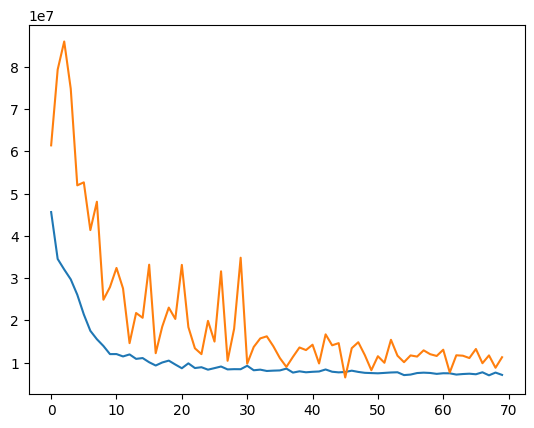

In [220]:
plt.plot(history.history["root_mean_squared_error"])
plt.plot(history.history["val_root_mean_squared_error"])

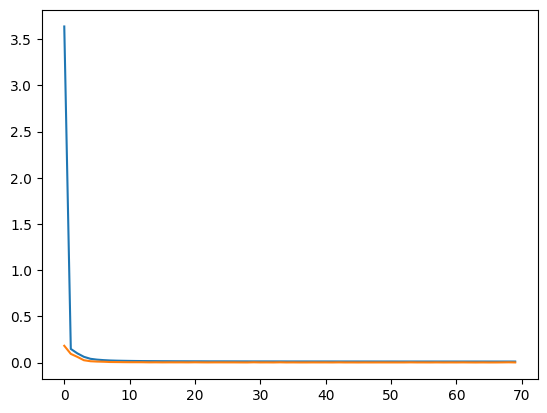

In [221]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [222]:
import pickle
from keras.models import load_model

with open('buy_model.pickle', 'wb') as f:
    pickle.dump(clf, f)

clf.save('buy_model.h5')

In [6]:
import pandas as pd

In [7]:
pf = pd.read_csv(r'/content/Makaan_Properties_Buy.csv', encoding='latin-1')

In [8]:
pip install ydata-profiling


In [9]:
from ydata_profiling import ProfileReport
prof = ProfileReport(pf)
prof.to_file('output.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 32/32 [01:01<00:00,  1.92s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]